# Socio-Demographic Characterization of users: `/r/PC` and `/r/PCM`
- To replicate: **Figure 3**, **Figure 5**, **Figure B.4**, **Figure B.6**

## 0. Load data

In [1]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
from scipy import stats
from scipy.sparse import coo_matrix, csr_matrix
import seaborn as sns
import sklearn.preprocessing
import sklearn.utils
import statsmodels.api as sm
from tqdm import tqdm
import warnings
import sys

sys.path += ['../']

from config import processed_data_path, raw_data_path, figure_path

# Parameters
DATA_PATH = raw_data_path
FIGURES_PATH = figure_path
OUTPUT_PATH = processed_data_path

SUBREDDITS = {
    'PoliticalCompass': 'PC',
    'PoliticalCompassMemes': 'PCM'}

# Flairs order for plots:
SOCIAL_ORDER = ['Lib', 'Centrist', 'Auth']
ECONOMIC_ORDER = ['Left', 'Centrist', 'Right']

FEATURE2CLASSES = {'age': ['Young', 'Old'],
                   'gender': ['Male', 'Female'],
                   'affluence': ['Poor', 'Rich'],
                   'partisan': ['Left', 'Right']}

CLASSES = [x for pair in FEATURE2CLASSES.values() for x in pair]

N = len(CLASSES)

# Plot style
sns.set_context('talk', rc={'font.size': 14.0,
                            'axes.labelsize': 14.0,
                            'axes.titlesize': 14.0,
                            'xtick.labelsize': 12.0,
                            'ytick.labelsize': 12.0,
                            'legend.fontsize': 12.0,
                            'legend.title_fontsize': 16.0,
                            'patch.linewidth': 1.5,
                            'font.family': 'serif',
                            'font.serif': 'Linux Libertine O',
                           }
               )

In [2]:
# Users and edges of interaction networks
users_df = {}
edges_df = {}
nodes_df = {}
socio_demographic_features = {}

for S in SUBREDDITS.keys():
    
    # Users with single flair
    users_df[S] = pd.read_csv(OUTPUT_PATH + f"single_flair_anonymized_users_{SUBREDDITS[S]}.csv")[['author', 'flair']]
    print(f"{S}: users loaded ✓")
    
    # Edges from Interaction Network
    edges_df[S] = pd.read_csv(DATA_PATH + f"edges_anonymized_{SUBREDDITS[S]}.csv")[['child', 'parent']]
    print(f"{S}: edges loaded ✓")

    nodes_df[S] = users_df[S][users_df[S]['author'].isin(set(edges_df[S]['child']).union(edges_df[S]['parent']))]
    print(f"{S}: nodes selected ✓")   

    socio_demographic_features[S] = pd.read_csv(DATA_PATH + f"socio_demographics_anonymized_{SUBREDDITS[S]}.csv")

PoliticalCompass: users loaded ✓
PoliticalCompass: edges loaded ✓
PoliticalCompass: nodes selected ✓
PoliticalCompassMemes: users loaded ✓
PoliticalCompassMemes: edges loaded ✓
PoliticalCompassMemes: nodes selected ✓


## 2. Socio-demographic features distribucion by ideologic axis

/tmp/ipykernel_1235405/3065524362.py:27: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` inst

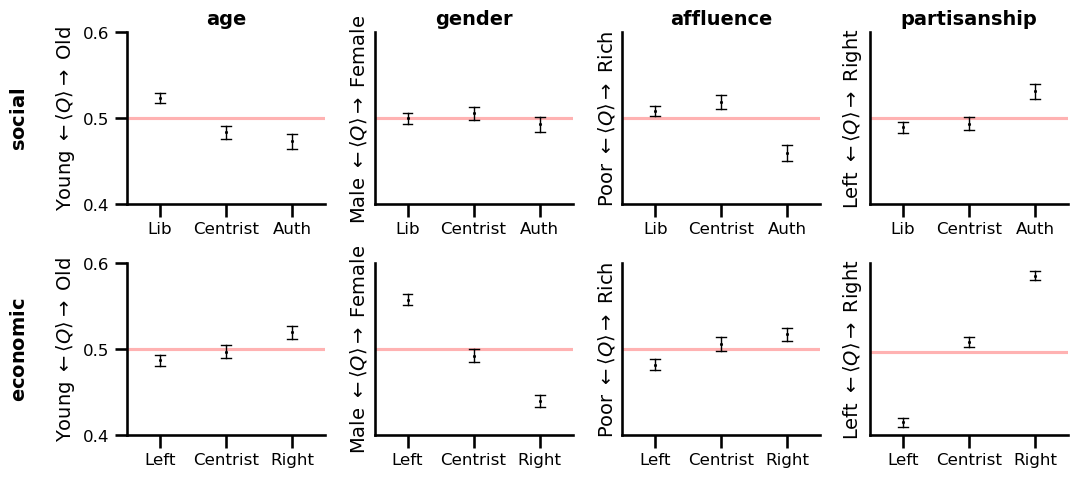

/tmp/ipykernel_1235405/3065524362.py:27: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=socio_demographic_features[S],
/tmp/ipykernel_1235405/3065524362.py:27: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` inst

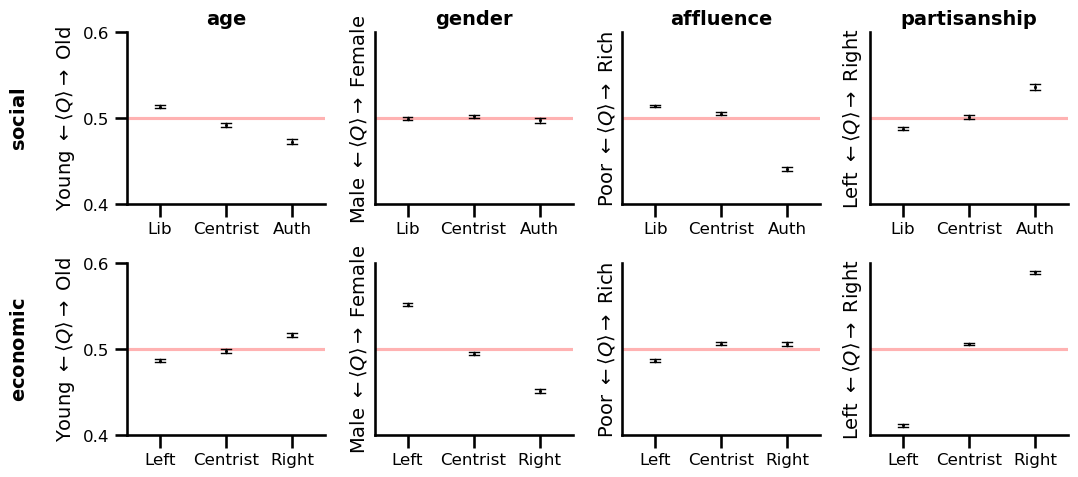

In [3]:
for S in SUBREDDITS:
    fig = plt.figure(layout='tight', figsize=(11,5))
    ax = fig.subplot_mosaic(
    '''
    ABCD
    EFGH
    ''')#, sharey=True)

    plot_order = {
        ('social','age'): 'A',
        ('social','gender'): 'B',
        ('social','affluence'): 'C',
        ('social','partisan'): 'D',
        ('economic','age'): 'E',
        ('economic','gender'): 'F',
        ('economic','affluence'): 'G',
        ('economic','partisan'): 'H'
    }

    orders = {
        'social': SOCIAL_ORDER,
        'economic': ECONOMIC_ORDER
    }

    for axis in ['social', 'economic']:
        for feature in ['age', 'gender', 'affluence', 'partisan']:
            sns.pointplot(data=socio_demographic_features[S],
                          x=axis, y=feature,
                          ax=ax[plot_order[(axis,feature)]], 
                          #errorbar='se', estimator='mean',
                          estimator='mean', errorbar=('ci', 95),
                          order=orders[axis],
                          capsize=0.15, markers='o', linestyles='', errwidth=1, scale=0.2, color='k'
                         )

            ax[plot_order[(axis,feature)]].axhline(0.5, ls='-', c='r', alpha=0.3, zorder=0)
            ax[plot_order[(axis,feature)]].set_yticks([0.4, 0.5, 0.6])

            ax[plot_order[(axis,feature)]].set_ylabel('')

            ax[plot_order[(axis, feature)]].tick_params(bottom=True, labelbottom=True,
                                                        labelrotation=0)

            if (plot_order[(axis, feature)] != 'A') & (plot_order[(axis, feature)] != 'E'):
                ax[plot_order[(axis, feature)]].tick_params(left=False, labelleft=False)

            ax[plot_order[(axis, feature)]].set_xlabel('')
            if axis == 'social':
                if feature != 'partisan':
                    ax[plot_order[(axis, feature)]].set_title(f'{feature}', weight='bold')
                else:
                    ax[plot_order[(axis, feature)]].set_title(f'partisanship', weight='bold')

        sns.despine(right=True)

        ax['A'].set_ylabel(r'$\mathbf{social}$' + '\n\n' + r'Young $\leftarrow \langle Q \rangle \rightarrow$ Old')
        ax['B'].set_ylabel(r'Male $\leftarrow \langle Q \rangle \rightarrow$ Female')
        ax['C'].set_ylabel(r'Poor $\leftarrow \langle Q \rangle \rightarrow$ Rich')
        ax['D'].set_ylabel(r'Left $\leftarrow \langle Q \rangle \rightarrow$ Right')

        ax['E'].set_ylabel(r'$\mathbf{economic}$' + '\n\n' + r'Young $\leftarrow \langle Q \rangle \rightarrow$ Old')
        ax['F'].set_ylabel(r'Male $\leftarrow \langle Q \rangle \rightarrow$ Female')
        ax['G'].set_ylabel(r'Poor $\leftarrow \langle Q \rangle \rightarrow$ Rich')
        ax['H'].set_ylabel(r'Left $\leftarrow \langle Q \rangle \rightarrow$ Right')

    plt.subplots_adjust(wspace=10, hspace=0.4)
    
    plt.savefig(FIGURES_PATH + f'1_avg_quantile_socio_demographics_{SUBREDDITS[S]}.pdf', bbox_inches='tight')
    plt.show()

## 3. Logit regression model

In [4]:
for S in SUBREDDITS.keys():
    socio_demographic_features[S] = socio_demographic_features[S][['user', 'age', 'gender', 'affluence']]

    # Only edges by users with demographic features
    edges_df[S] = edges_df[S][(edges_df[S].child.isin(set(socio_demographic_features[S].user))) & \
                              (edges_df[S].parent.isin(set(socio_demographic_features[S].user)))
                             ]

In [5]:
# Features for each user
user_features = {}

if 'Left' in CLASSES:
    CLASSES.remove('Left')
if 'Right' in CLASSES:
    CLASSES.remove('Right')
if 'partisan' in FEATURE2CLASSES.keys():
    FEATURE2CLASSES.pop('partisan')

for S in SUBREDDITS:
    user_features[S] = socio_demographic_features[S].reset_index()
    for feature, (class_low, class_hi) in FEATURE2CLASSES.items():
        user_features[S][class_low] = user_features[S][feature] <= 0.25
        user_features[S][class_hi] = user_features[S][feature] >= 0.75

In [29]:
# Functions
def do_results_table(logreg_res, variable_names):   
    results_rows = []
    conf_int = logreg_res.conf_int(alpha=0.05)
    for a in CLASSES:
        for b in CLASSES:
            idx = variable_names.index(
                f"{a}_child*{b}_parent"
            ) + 1 # for Intercept
            param = logreg_res.params[idx]
            lo, hi = conf_int[idx]
            signif = []
            for alpha in (0.05, 0.01, 0.001):
                lo, hi = logreg_res.conf_int(alpha=alpha)[idx]
                signif.append((lo * hi) > 0)
            results_rows += [[a, b, param, (param - lo), (hi - param)] + signif]
    
    results_columns = ["class_child", "class_parent"]
    results_columns += ['param', 'down_err', 'up_err', 'signif', 'signif01', 'signif001']
    return pd.DataFrame(results_rows, columns=results_columns)

def get_num_signif_years(signs):
    mode_value, mode_count = scipy.stats.mode(signs)
    if isinstance(mode_count, np.int64):
        return mode_count if mode_value != 0 else 0
    return mode_count[0] if mode_value != 0 else 0

def subsample_neg_pairs(graph_df):
    edges_set = set(map(tuple, graph_df.values))
    non_edges = []
    pbar = tqdm(total=len(graph_df))
    while len(non_edges) < len(graph_df):
        sample_size = min(2 ** 17, len(graph_df) - len(non_edges))  # 2**17 overflow
        column_samples = [np.random.choice(graph_df[c], sample_size) for c in graph_df.columns]
        new_non_edges = [sample for sample in zip(*column_samples) if sample not in edges_set]
        non_edges += new_non_edges
        pbar.update(len(new_non_edges))
    pbar.close()
    return pd.DataFrame(non_edges, columns=graph_df.columns)

In [7]:
non_edges_df = {}
regression_df = {}
regression_variables = {}
variable_names = {}
X = {}
logreg = {}
logreg_res = {}

N = len(CLASSES)

for S in SUBREDDITS:
    print(f"{S}:")
    np.random.seed(42)
    non_edges_df[S] = subsample_neg_pairs(edges_df[S])
    non_edges_df[S]['is_link'] = 0.
    edges_df[S]['is_link'] = 1.

    regression_df[S] = sklearn.utils.shuffle(
        pd.concat([edges_df[S], non_edges_df[S]])
        .merge(user_features[S], left_on='child', right_on='user')
        .merge(user_features[S], left_on='parent', right_on='user',
               suffixes=('_child', '_parent')))
    regression_df[S] = regression_df[S][['is_link',
                                         'Young_child', 'Old_child', 'Male_child', 'Female_child',
                                         'Poor_child', 'Rich_child',
                                         'Young_parent', 'Old_parent', 'Male_parent', 'Female_parent',
                                         'Poor_parent', 'Rich_parent']]
    
    regression_variables[S] = [(f"{c1}_child*{c2}_parent",
                                regression_df[S][f"{c1}_child"] & regression_df[S][f"{c2}_parent"]
                               ) for c1 in CLASSES for c2 in CLASSES]
    variable_names[S] = [name for name, value in regression_variables[S]]
    X[S] = np.vstack([value for name, value in regression_variables[S]]).astype(float).T
    logreg[S] = sm.Logit(np.array(regression_df[S].is_link.values),
                  sm.add_constant(X[S], has_constant='add'),
                  missing='raise')

    logreg_res[S] = logreg[S].fit(maxiter=1000, method='lbfgs', disp=True)

PoliticalCompass:


100%|██████████| 261078/261078 [00:00<00:00, 3215373.61it/s]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.46221D-03

At iterate    1    f=  6.92841D-01    |proj g|=  2.90201D-03

At iterate    2    f=  6.92813D-01    |proj g|=  6.80262D-04

At iterate    3    f=  6.92772D-01    |proj g|=  3.99541D-04

At iterate    4    f=  6.92735D-01    |proj g|=  1.72547D-04


 This problem is unconstrained.



At iterate    5    f=  6.92723D-01    |proj g|=  1.20211D-04

At iterate    6    f=  6.92718D-01    |proj g|=  8.20687D-05

At iterate    7    f=  6.92717D-01    |proj g|=  3.82435D-05

At iterate    8    f=  6.92717D-01    |proj g|=  1.79254D-05

At iterate    9    f=  6.92717D-01    |proj g|=  8.22552D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   37      9     14      1     0     0   8.226D-06   6.927D-01
  F =  0.69271725892258362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
PoliticalCompassMemes:


100%|██████████| 8065395/8065395 [00:03<00:00, 2520847.60it/s]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.20598D-03


 This problem is unconstrained.



At iterate    1    f=  6.92271D-01    |proj g|=  2.47529D-03

At iterate    2    f=  6.92248D-01    |proj g|=  8.11783D-04

At iterate    3    f=  6.92239D-01    |proj g|=  6.82437D-04

At iterate    4    f=  6.92199D-01    |proj g|=  3.19280D-04

At iterate    5    f=  6.92188D-01    |proj g|=  2.44012D-04

At iterate    6    f=  6.92176D-01    |proj g|=  1.11200D-04

At iterate    7    f=  6.92175D-01    |proj g|=  1.17404D-04

At iterate    8    f=  6.92174D-01    |proj g|=  2.57530D-05

At iterate    9    f=  6.92174D-01    |proj g|=  1.10579D-05

At iterate   10    f=  6.92174D-01    |proj g|=  7.26773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [30]:
results_dfs = {}
df = {}
df_signif_all_years = {}
df2 = {}

for S in SUBREDDITS:
    results_dfs[S] = []
    results_dfs[S] += [do_results_table(logreg_res[S], variable_names[S])]
    df[S] = pd.concat(results_dfs[S])
    df[S]['sign'] = df[S][['param','signif']].apply(lambda x: np.sign(x[0]) if x[1] else 0, axis=1)
    df_signif_all_years[S] = (df[S].groupby(['class_child', 'class_parent'])
                              .sign
                              .agg(get_num_signif_years)
                              .reset_index()
                              .rename(columns={'sign': 'num_signif_years'}))

    df2[S] = pd.merge(df[S], df_signif_all_years[S])

/tmp/ipykernel_1235405/2299820616.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[S]['sign'] = df[S][['param','signif']].apply(lambda x: np.sign(x[0]) if x[1] else 0, axis=1)
/tmp/ipykernel_1235405/2299820616.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[S]['sign'] = df[S][['param','signif']].apply(lambda x: np.sign(x[0]) if x[1] else 0, axis=1)


In [31]:
field2table2 = {}
matrix2 = {}
for S in SUBREDDITS:
    field2table2[S] = {field: (df2[S]
                               .pivot(index='class_child', columns='class_parent', values=field)
                               .loc[CLASSES].reindex(columns=CLASSES)
                              ) for field in ('param', 'num_signif_years', 'signif')}

    matrix2[S] = field2table2[S]['param'].values.copy()
    matrix2[S][field2table2[S]['num_signif_years'].values < 1] = np.nan

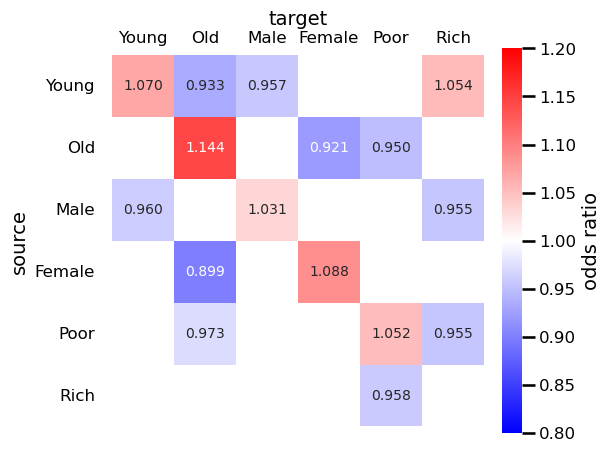

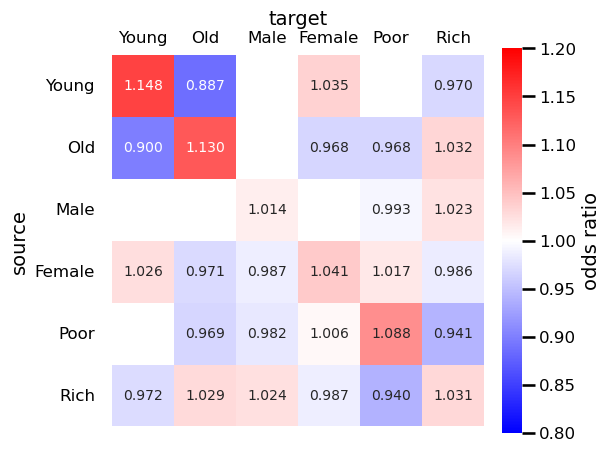

In [32]:
#vmin, vmax = 0.629, 1.371
vmin, vmax = 0.8, 1.2
for S in SUBREDDITS:
    fig = plt.figure(layout='constrained', figsize=(6,6))

    ax = sns.heatmap(np.exp(matrix2[S]),
                     cmap='bwr',
                     annot=True, annot_kws={'fontsize': 10}, fmt='.3f',
                     vmin=vmin, vmax=vmax, #center=1.0,
                     cbar=True, cbar_kws={'label': 'odds ratio', 'shrink': 0.65},
                     square=True
                    )
    ax.set_xticks(np.arange(N)+0.5, CLASSES, rotation = 0,
                  ha="center", va='center', rotation_mode="anchor")
    ax.set_yticks(np.arange(N)+0.5, CLASSES)
    ax.set_ylabel('source')
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('target')
    #ax.set_title(f'/r/{S_CODE[S]}', weight='bold')

    ax.tick_params(left=False, top=False)
    ax.tick_params(axis='y', labelrotation=0)

    plt.savefig(FIGURES_PATH + f'1_socio_demographic_odds_ratio_{SUBREDDITS[S]}.pdf', bbox_inches='tight')
    plt.show()